# Boston House Prices

Regression predictive modeling machine learning problem from end-to-end Python

此檔案使用scikit-learn 機器學習套件裡的linear regression演算法，來達成波士頓房地產價錢預測

    資料集：波士頓房產
    特徵：房地產客觀數據，如年份、平面大小
    預測目標：房地產價格
    機器學習方法：線性迴歸
    探討重點：10 等分的交叉驗証(10-fold Cross-Validation)來實際測試資料以及預測值的關係
    關鍵函式： sklearn.cross_validation.cross_val_predict；joblib.dump；joblib.load
https://scikit-learn.org/stable/modules/cross_validation.html

## (一)波士頓房地產資料庫

引入之函式庫如下

    sklearn.datasets: 用來匯入內建之波士頓房地產資料庫
    sklearn.cross_val_score: 使用交叉驗證用來評估辨識準確度
    sklearn.linear_model: 線性分析之模組
    matplotlib.pyplot: 用來繪製影像

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import numpy as np

In [2]:
boston = datasets.load_boston()

for key,value in boston.items() :      ##顯示資料數
    #print(key)
    try:
        print (key,value.shape)
    except:
        print (boston[key])

y=boston.target
#print(y)

data (506, 13)
target (506,)
feature_names (13,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value pr

In [3]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
import pandas as pd
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'],columns=['target'])
#data = pd.concat([x,y], axis=1)

In [6]:
x.head(10)


CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.12   5.21  
6     15.2  395.60  12.43  
7     15.2  396.90  19.15  
8     15.2  386.63  29.93  
9     15.2  386.71  17.10

In [7]:
y.head(10)

target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9

## (三)使用joblib.dump匯出預測器

from sklearn.externals import joblib

joblib.dump(lr,"./lr_machine.pkl")

使用joblib.dump將線性回歸預測器匯出為pkl檔。

## (四)訓練、預測以及儲存模型

    接著使用lr=joblib.load("./lr_machine.pkl")將pkl檔匯入為一個linear regression預測器lr。
    接著使用波士頓房地產數據(boston.data)，以及預測目標(y)來訓練預測機lr 
    lr.fit(boston.data, y)
   


### 訓練

In [8]:
lr = linear_model.LinearRegression()
lr.fit(x[:450], y[:450]) #只丟前450筆資料訓練


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
print("mse of training data:",mean_squared_error(lr.predict(x[:450]), y[:450]))
print("mse of test data:",mean_squared_error(lr.predict(x[450:]), y[450:]))

mse of training data: 23.338640941082218
mse of test data: 11.407003268827825


### 預測

In [10]:
#使用sklearn function : predict()
predicted=lr.predict(x[:450])
print(predicted[:10])
print('-'*20)
predict_y=lr.predict(x[451:452])
print(predict_y)

[[29.86172553]
 [25.29745879]
 [30.89009725]
 [28.95648368]
 [28.33054091]
 [25.60439174]
 [22.9824685 ]
 [19.67475997]
 [11.3511336 ]
 [19.03318789]]
--------------------
[[20.02045317]]


$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+w_{4}x_{4}+...+w_{13}x_{13}+b$$

In [11]:
#print('Coefficients: ', lr.coef_)
#print('interception: ', lr.intercept_)
def lr_predict(lr,x):
    W=lr.coef_
    b=lr.intercept_
    return np.dot(x,W.T)+b
    
lr_predict(lr,x[451:453])

array([[20.02045317],
       [19.1112216 ]])

### 匯出模型

In [12]:
joblib.dump(lr,"./lr_machine.pkl")
#匯入
#lr=joblib.load("./lr_machine.pkl")


['./lr_machine.pkl']

## (五)繪出預測結果與實際目標差異圖

    X軸為預測結果，Y軸為回歸目標。 並劃出一條斜率=1的理想曲線(用虛線標示)。
    紅點為房地產第三項數據的預測結果。

In [13]:
#ploting for training data 

plt.title('ploting for training data',fontsize='large') #set title
test_size=len(y[:450])
plt.scatter(np.arange(test_size),y[:450],s=3,label='real')
plt.scatter(np.arange(test_size),lr.predict(x[:450]),s=3,label='predicted')
plt.legend(loc='lower left')
print("mse:",mean_squared_error(lr.predict(x[:450]), y[:450]))


mse: 23.338640941082218


In [14]:
##ploting for all 
plt.title('ploting for all data',fontsize='large') #set title
test_size=len(y)
plt.scatter(np.arange(test_size),y,s=3,label='real')
plt.scatter(np.arange(test_size),lr.predict(x),s=3,label='predicted')
plt.legend(loc='lower left')
print("mse:",mean_squared_error(lr.predict(x), y))

mse: 22.01814349118845


56
mse: 11.407003268827825


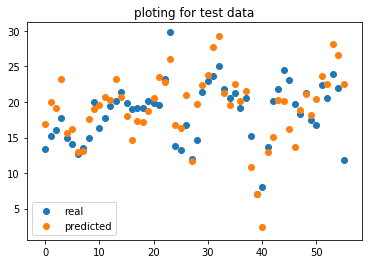

In [15]:
#ploting for test data 
plt.title('ploting for test data',fontsize='large') #set title
test_size=len(y[450:])
print(test_size)
plt.scatter(np.arange(test_size),y[450:],label='real')
plt.scatter(np.arange(test_size),lr.predict(x[450:]),label='predicted')
plt.legend(loc='lower left')
print("mse:",mean_squared_error(lr.predict(x[450:]), y[450:]))

In [16]:
plt.scatter(predicted,y[:450],s=2)
plt.plot(predict_y, y[451:452], 'ro')
# 劃出一條斜率=1 (即 x=y)的理想曲線(用虛線標示)。
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k-', lw=2)
print(y.min())
print(y.max())
#----
# X    Y
# min min  (first point)
# max max  (second point)
plt.xlim(0,60)
plt.ylim(0,60)
plt.xlabel('Predicted')
plt.ylabel('Real')


target    5.0
dtype: float64
target    50.0
dtype: float64


Text(0, 0.5, 'Real')

## (六) k-fold cross-validation : evaluating estimator performance
5-fold cross-validation: 將資料切分為5等份，以其中4等份為訓練集，另外1等份則為測試集。

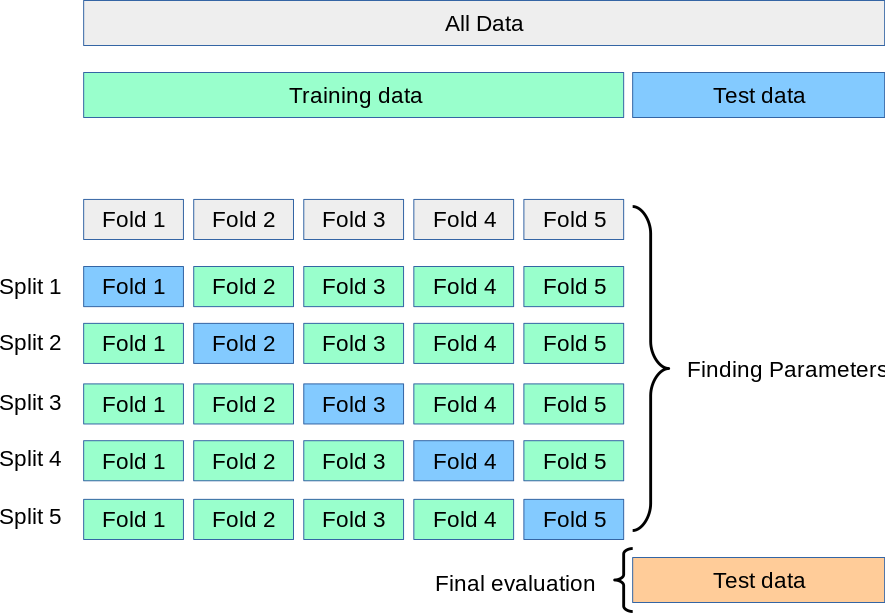

In [17]:
cv_score=[]
lr_cv = linear_model.LinearRegression()

#1 : [:90] test ,[90:450] traing
lr_cv.fit(x[90:450], y[90:450]) 
cv_score.append(mean_squared_error(lr_cv.predict(x[:90]), y[:90]))

#2 : [90:180] test ,[0:90]+[180:450] traing
concate_x=np.concatenate((x[0:90], x[180:450]), axis=0)
concate_y=np.concatenate((y[0:90], y[180:450]), axis=0)
lr_cv.fit(concate_x, concate_y) 
cv_score.append(mean_squared_error(lr_cv.predict(x[90:180]), y[90:180]))

#3 : [180:270] test ,[0:180]+[270:450] traing
concate_x=np.concatenate((x[0:180], x[270:450]), axis=0)
concate_y=np.concatenate((y[0:180], y[270:450]), axis=0)
lr_cv.fit(concate_x, concate_y) 
cv_score.append(mean_squared_error(lr_cv.predict(x[180:270]), y[180:270]))

#4 : [270:360] test ,[0:270]+[360:450] traing
concate_x=np.concatenate((x[0:270], x[360:450]), axis=0)
concate_y=np.concatenate((y[0:270], y[360:450]), axis=0)
lr_cv.fit(concate_x, concate_y) 
cv_score.append(mean_squared_error(lr_cv.predict(x[270:360]), y[270:360]))

#5 : [360:450] test ,[0:360] traing
lr_cv.fit(x[0:360], y[0:360]) 
cv_score.append(mean_squared_error(lr_cv.predict(x[360:450]), y[360:450]))

cv_score=np.array(cv_score)
print(cv_score)
print(cv_score.mean())

[ 10.05907858  42.40990327  49.07926157  11.8049291  345.56084075]
91.78280265482638



  ### cross_val_score(estimator,x,y,cv)

    X:機器學習數據
    y:為回歸目標，
    cv:Cross-Validation. integer, to specify the number of folds in a (Stratified) K-Fold,
    
    Regression 常用MSE來評估好壞, MSE愈大, 愈不好,但在使用score object,我們期待
    分數愈高愈好, 所以加上負號 score=-MSE  
    from sklearn.metrics import make_scorer
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    score=cross_val_score(lr, x[:450], y[:450],scoring=scorer, cv=10) 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

In [21]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated

#Evaluate a score by cross-validation

score=cross_val_score(lr, x[:450], y[:450],scoring='neg_mean_squared_error', cv=100) 
print(score)
print('mean score:',score.mean())
plt.plot(score)

plt.ylabel('Cross-Validated Accuracy')
plt.show()


[ -30.09377616  -21.4968822    -6.44639163   -5.89567603   -0.98087062
   -0.70854728   -8.44504204   -8.18747635   -1.05081142   -9.37840323
   -9.10154749   -4.63200038  -21.49985231  -17.36578583   -0.76713265
   -4.84743892   -4.00390059  -15.88952546  -33.05910764  -20.39967717
   -2.59439818   -3.29284848  -13.86243927   -5.87094592   -3.74550282
   -1.17313605   -4.91117932   -2.18327752  -36.96558856  -35.59008208
  -12.40789957  -22.85832798  -85.76194033  -37.7664813   -21.62527275
   -9.53768504  -26.92643602  -46.38260245  -13.56024346  -25.20571373
  -34.43630427   -7.57081041  -49.23349124  -16.33331768  -23.87478092
  -48.37638874  -27.88091636  -16.96187982  -13.05903004  -12.33595545
  -53.16499066  -22.42126447  -15.42387933  -24.54568999  -33.80058138
   -6.27365829   -7.81049822  -10.31733006  -24.59544238  -12.49801048
  -14.4883305    -1.94981117  -36.5162514    -4.77488578  -22.99418792
  -16.0361644    -6.60108388   -1.89391422   -2.10914422   -2.68042052
   -5.